### Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
tf.keras.backend.set_floatx('float64')

from sklearn.metrics import r2_score, mean_squared_error

### Net

In [2]:
def createTrainingData():
  for category in CATEGORIES:
    path = os.path.join(path_test, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      training.append([new_array, CAT[class_num]])

def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric], ls='dashed')
        ax[idx].set_xlabel('epochs')
        ax[idx].set_ylabel(metric)
        ax[idx].plot(history.history['val_'+metric]);
        ax[idx].legend(['train_'+metric, 'val_'+metric])

In [3]:
IMG_SIZE=50
IMG_CHANNELS = 3
CATEGORIES = ["0","20","50","80","100","150","200","300","400"]
CAT = [0,4.54,11.31,18.05,22.52,33.63,44.64,66.37,87.72]

In [4]:
path_test = "E:/project_final/sun/split_final_org/train/"
training = []
createTrainingData()

X_train =[]
y_train =[]
for features, label in training:
  X_train.append(features)
  y_train.append(label)
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_train = X_train.astype('float32')
X_train /= 255
X_train = np.array(X_train)
y_train = np.array(y_train)

path_test = "E:/project_final/sun/split_final_org/test/"
training = []
createTrainingData()
X_test =[]
y_test =[]
for features, label in training:
  X_test.append(features)
  y_test.append(label)
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_test = X_test.astype('float32')
X_test /= 255
X_test = np.array(X_test)
y_test = np.array(y_test)

path_test = "E:/project_final/sun/split_final_org/val/"
training = []
createTrainingData()
X_val =[]
y_val =[]
for features, label in training:
  X_val.append(features)
  y_val.append(label)
X_val = np.array(X_val).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_val = X_val.astype('float32')
X_val /= 255
X_val = np.array(X_val)
y_val = np.array(y_val)

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, IMG_CHANNELS)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(units=1, activation=None)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 128)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 64)                4718656   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                        

In [6]:
#tf.keras.utils.plot_model(
#    model,
#    to_file="model.png",
#    show_shapes=True,
#    show_dtype=False,
#    show_layer_names=False,
#    rankdir="TB",
#    expand_nested=False,
#    dpi=96,
#)

In [7]:
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [8]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

Epoch 1/50
217/217 [==============================] - 125s 90ms/step - loss: 176.2430 - root_mean_squared_error: 13.2757 - val_loss: 90.1403 - val_root_mean_squared_error: 9.4942
Epoch 2/50
217/217 [==============================] - 19s 86ms/step - loss: 73.7208 - root_mean_squared_error: 8.5861 - val_loss: 85.1067 - val_root_mean_squared_error: 9.2253
Epoch 3/50
217/217 [==============================] - 18s 85ms/step - loss: 40.0440 - root_mean_squared_error: 6.3280 - val_loss: 22.4422 - val_root_mean_squared_error: 4.7373
Epoch 4/50
217/217 [==============================] - 18s 85ms/step - loss: 28.0561 - root_mean_squared_error: 5.2968 - val_loss: 24.4008 - val_root_mean_squared_error: 4.9397
Epoch 5/50
217/217 [==============================] - 18s 85ms/step - loss: 31.4469 - root_mean_squared_error: 5.6078 - val_loss: 15.7496 - val_root_mean_squared_error: 3.9686
Epoch 6/50
217/217 [==============================] - 19s 86ms/step - loss: 22.8890 - root_mean_squared_error: 4.7842

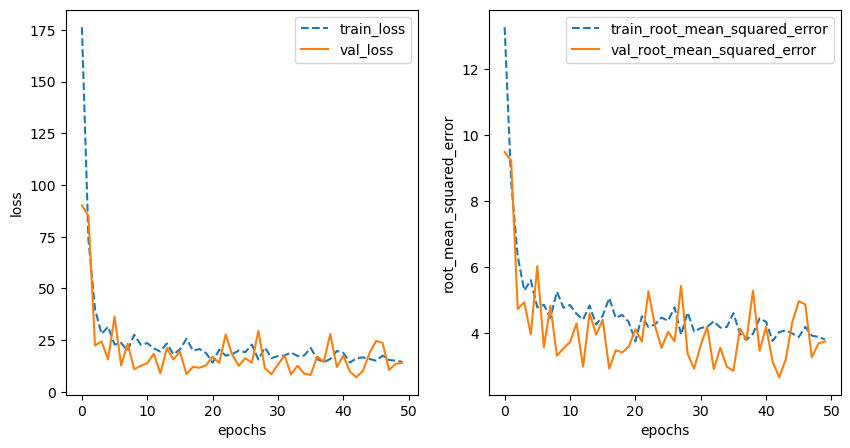

In [9]:
training_plot(['loss', 'root_mean_squared_error'], history)

47/47 [==============================] - 1s 27ms/step
Slope: [0.95375212]
Intercept: [-0.83471158]
MSE: 15.605564589266015
Root mean squared error:  3.9503879036451615
R2 score:  0.9797592460915993


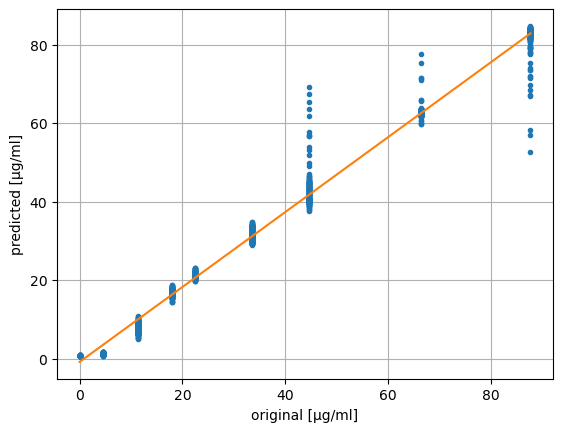

In [10]:
prediction = model.predict(X_test)

#create basic scatterplot
plt.plot(y_test, prediction, '.')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test, prediction, 1)

#add linear regression line to scatterplot 
plt.plot(y_test, m*y_test+b)
plt.grid()
plt.xlabel('original [μg/ml]') 
plt.ylabel('predicted [μg/ml]') 

# model evaluation 
mse=mean_squared_error(y_test,prediction) 
rmse = np.sqrt(mean_squared_error(y_test,prediction)) 
r2 = r2_score(y_test,prediction) 

# printing values 
print('Slope:' , m) 
print('Intercept:', b) 
print('MSE:', mse) 
print('Root mean squared error: ', rmse) 
print('R2 score: ', r2) 

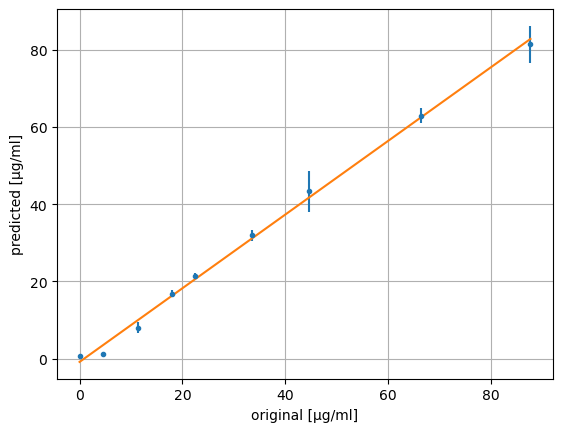

In [11]:
prediction_g=prediction.reshape(-1, 165)
mean_pred=[]
std_pred=[]
for i in range(9):
    mean_pred.append(np.mean(prediction_g[i]))
    std_pred.append(np.std(prediction_g[i]))

plt.errorbar(CAT, mean_pred, std_pred, linestyle='None', marker='.')
plt.plot(CAT, m*CAT+b)
plt.grid()
plt.xlabel('original [μg/ml]') 
plt.ylabel('predicted [μg/ml]') 

plt.show()